In [5]:

import numpy as np

import math

import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import norm
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style('ticks')
sns.set_context("talk", rc={"lines.linewidth": 2})


tyear=3.15551e+07

from astropy.io import ascii

mearth = 5.97e24
tyear=365.25*24*60*60

import re
import llr_release as llr

In [6]:

dir1=['']
dir2=['']

dirlist=['mtot_1000_dmax_30km_fv_0.04/', 'mtot_100_dmax_30km_fv_0.04/', 'mtot_10_dmax_30km_fv_0.04/']
second_dirlist=['mtot_100_dmax_1000km_fv_0.04/', 'mtot_100_dmax_100km_fv_0.04/', 'mtot_100_dmax_30km_fv_0.04/']
second_dirlist=['mtot_100_dmax_30km_fv_0.04/']



vol=[0,0,0,0,0,0]

h=[0.01,0.01,0.01, 0.01, 0.01,0.01,0.01]
dirsave='/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/'

dir1=dirlist
dir2=second_dirlist
print(dir1)
for j in range(0,np.size(dirlist)):   
    dir1[j]=dirsave + dirlist[j]
for j in range(0,np.size(second_dirlist)):  
    dir2[j]=dirsave + second_dirlist[j]

print(dir1)    

label=['$M_{tot}(0)=1000M_\oplus$', '$M_{tot}(0)=100M_\oplus$','$M_{tot}(0)=10M_\oplus$']


initial_output_many=[1, 1, 1, 1, 1, 1, 1]

color_list = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
  
    
linestyle_list=[":", 'dashed', 'solid']

['mtot_1000_dmax_30km_fv_0.04/', 'mtot_100_dmax_30km_fv_0.04/', 'mtot_10_dmax_30km_fv_0.04/']
['/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_1000_dmax_30km_fv_0.04/', '/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/', '/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_10_dmax_30km_fv_0.04/']


In [7]:
print(dir1)

['/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_1000_dmax_30km_fv_0.04/', '/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/', '/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_10_dmax_30km_fv_0.04/']


In [8]:
def get_gas(file):
    dat = ascii.read(file)
    gas=dat[1][:]
    return (gas)

def get_delta_gas(gas):
    delta_gas=np.zeros(np.size(gas))
    for i in range(0,np.size(gas)-1):
        delta_gas[i]=gas[i+1]-gas[i]
        if delta_gas[i]<1e-3:
            delta_gas[i]=delta_gas[i-1]
    return(delta_gas)
def get_mdot(file):
    dat1 = ascii.read(file)
    mdot=dat1[1][:]
    return(mdot)

def get_mdot_new(file):
    dat1 = ascii.read(file)
    timestep=dat1[1][:]
    mdot=dat1[2][:]
    return(mdot, timestep)

def get_gas_new(file):
    dat = ascii.read(file)
    timestep=dat[1][:]
    gas=dat[2][:]
    return (gas, timestep)
def get_delta_gas_new(gas, timestep):
    delta_gas=np.zeros(np.size(gas))
    for i in range(0,np.size(gas)-1):
        delta_gas[i]=(gas[i+1]-gas[i])/(timestep[i+1]-timestep[i])
    return(delta_gas)

 # nb this is the total mass released to solids - not the rate!



In [9]:
def get_mass (itime_max_float, file, vol):

        
        f = open(file, "r")

        if (vol==0):
            f.readline() # first line of constants
            f.readline() # gas

            f.readline() # mdot
            f.readline() # mdot
        if (vol==1):
            f.readline()


        
        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
            
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))
            if (vol==0):
                f.readline() #  Gas 
                f.readline() # Mdot
            #print(mass)
    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_all_1)
         

In [10]:
def get_mass_time (itime_max_float, file, vol):

        
        f = open(file, "r")

        if (vol==0):
            f.readline() # first line of constants
            f.readline() # gas

            f.readline() # mdot
            f.readline() # mdot
        if (vol==1):
            f.readline()


        
        timestep=0
        timev=timestep
        
        line_split=f.readline()
            
        timestep_all=re.split(r' ', line_split.rstrip('  '))
        if (np.size(timestep_all)!=3):
            print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
        timestep=float(timestep_all[2])
        print ('T', timestep)
            
        mass=f.readline() # line with mass    

        mass_all=re.split(r'\t+', mass.rstrip('\t'))
        if (vol==0):
            f.readline() #  Gas 
            f.readline() # Mdot

        mass_return_scrap=mass_all
        mass_return=np.zeros([itime_max_float+1, np.size(mass_all)])
        print(mass_return.shape)
        mass_v=np.zeros(np.size(mass_all))

        for i in range(0,nbin-1): 
            mass_v[i]=float(mass_all_v[i])
        
        mass_return[0,:]=mass_v
        it=1
        while (timestep <  itime_max_float):
        # timestep line
            
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            print('T', timestep)
            timev=np.append(timev, timestep)
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))
            if (vol==0):
                f.readline() #  Gas 
                f.readline() # Mdot
            #print(mass)
            mass_v=np.zeros(np.size(mass_all))

            for i in range(0,nbin-1): 
                mass_v[i]=float(mass_all_v[i])
            mass_return[it,:]=mass_v
            it=it+1
 

    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        mass_v=np.zeros(np.size(mass_all))

        for i in range(0,nbin-1): 
            mass_v[i]=float(mass_all_v[i])


        f.close()

        return(mass_return, timev)
         

In [11]:
def get_inparam(file):    
    f = open(file, "r")
    f.readline() #restart
    f.readline() #calchi
    f.readline() #solid
    f.readline() #track origin
   

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta_t=float(delta_t_all[1])

    line_split=f.readline() #rin
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rin=float(delta_t_all[1])

   
    line_split=f.readline() #rout

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rout=float(delta_t_all[1])

    rbelt=(rin+ rout)/2.
    
    line_split=f.readline() #imax

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    imax=float(delta_t_all[1])
   

    line_split=f.readline() #ecc

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    ecc=float(delta_t_all[1])
    line_split=f.readline() #vrel

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    vrel=float(delta_t_all[1])

    
     # delta

    line_split=f.readline()  # 
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta=float(delta_t_all[1])
  

    line_split=f.readline()  # alpha
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    alpha_p=float(delta_t_all[1])


    alpha=(2+alpha_p)/3

        
    line_split=f.readline() # mtot0
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    mtot0=float(delta_t_all[1])

    line_split=f.readline()  # rho_s
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_s=float(delta_t_all[1])

    line_split=f.readline()  # rho_v
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_v=float(delta_t_all[1])

   
    line_split=f.readline() # dmax
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dmax=float(delta_t_all[1])



    line_split=f.readline() # dbl
    

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dbl=float(delta_t_all[1])

    f.readline() # ntime

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    outputinterval=float(delta_t_all[1])


    f.readline() # agrain


    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    fv0=float(delta_t_all[1])


    f.readline() # 
    

    f.close()
    
    diam_scrap=dmax
    i=0
    while(diam_scrap > dbl) :
           diam_scrap=(1-delta)**(1./3.)*diam_scrap 
           i=i+1 

    nbin=i-1


    mass_i=np.zeros(nbin)
    diam_i=np.zeros(nbin)


    diam_i[0]=dmax
    mass_i[0]=rho_s*diam_i[0]**3./6.
    for i in range(1, nbin-1):
        mass_i[i]=mass_i[i-1]*(1-delta)
    diam_i=(mass_i*6./rho_s)**(1./3.)
    return(delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho_s, mtot0, rbelt, alpha, ecc, fv0)

In [12]:
def get_rate (itime_max_float, file):

         #finds the rate as a function of diamter/mass at a particular epoch - given by itime_max_float
        # the file should be /rate_r.dat or /rate_c.dat 

        f = open(file, "r")

        f.readline()


         #print(itime_max_float, it)
        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
              #print(timestep,itime_max_float)
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))

    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_all_1)
        




0 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_1000_dmax_30km_fv_0.04/
plotting $M_{tot}(0)=1000M_\oplus$ /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_1000_dmax_30km_fv_0.04/
DG 1.971291e+21 8.30303e+21 0.2374182677889879
1 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/
plotting $M_{tot}(0)=100M_\oplus$ /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/
DG 1.971146e+19 8.296739e+19 0.23758081337740042
2 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_10_dmax_30km_fv_0.04/
plotting $M_{tot}(0)=10M_\oplus$ /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_10_dmax_30km_fv_0.04/
DG 1.971132e+17 8.296111e+17 0.23759711026045818
making figure
i am here


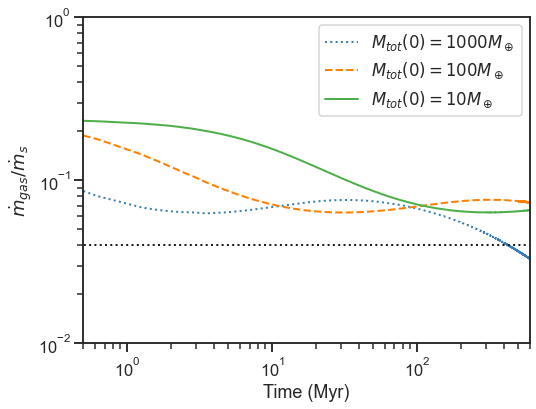

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))


for j in range(0,np.size(dir1)):
    print(j, dir1[j])
    file=dir1[j]+ 'mdot.dat'
    if initial_output_many[j] == 1:
        mdot, timestep=get_mdot_new(file)
        file=dir1[j]+'gas.dat'
        gas, timestep_g=get_gas_new(file)
        delta_gas=get_delta_gas_new(gas, timestep)
    else:
        #mdot=get_mdot(file)
        #for now - hack the version using grep Mdot out > mdot.dat 
        file=dir1[j]+ 'mdot.dat'
        mdot, timestep=get_mdot_new(file)
        file=dir1[j]+'gas.dat'
        gas=get_gas(file)
        delta_gas=get_delta_gas(gas)
    file= dir1[j]+ "inparam.in"
    
    delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho, mtot0, rbelt, alpha, ecc, fv0=get_inparam(file)
    time_i=np.arange(0,np.size(mdot)-1)

    
    
    s=2000    
    transition=np.arange(s,10000+1)
    transition=np.delete(transition, [4000-s,5000-s,6000-s,7000-s,8000-s,9000-s])
    delta_gas = np.delete(delta_gas, (transition), axis=0)
    timestep_g=np.delete(timestep_g, transition, axis=0)
    mdot=np.delete(mdot, transition, axis=0)

    plt.plot( delta_t*timestep_g[1:np.size(mdot)-5]/(tyear*1e6), (delta_gas[1:np.size(mdot)-5])/abs(mdot[1:np.size(mdot)-5]), label=label[j], color=color_list[j], linestyle=linestyle_list[j])
    print('plotting', label[j], dir1[j])

    print('DG', delta_gas[1], abs(mdot[1]),delta_gas[1]/abs(mdot[1]) )
    
    if vol[j]:
        if (j % 2) ==0:        
            rater_all=get_rate(1, dir1[j]+ "rater.dat") 

            rater=np.zeros(nbin)

            for i in range(0,nbin-1): 
                rater[i]=float(rater_all[i])
            index_1km=np.min(np.where(diam_i <1e3))
            print(index_1km)
            
            print('resurc',h[j], 1./(tyear*1e6*rater[index_1km]) )
    
    
print('making figure')    
ax.set_xscale('log')
ax.set_yscale('log')


plt.xlabel('Time (Myr)')
plt.ylabel('$\dot m_{gas}/\dot m_s$')


plt.plot([0.000001,1e8], [0.04,0.04], linestyle=':', color='k')

ax.legend(loc='upper right')


ax.set_ylim((0.01,1))


ax.set_xlim((0.5,6e2))

print('i am here')
plt.savefig(dirsave+"mdotgas_mdot.pdf")

    #######################################



In [14]:
###### read in Marino et al tables 

import pandas as pd
###https://arxiv.org/pdf/2001.10543.pdf
###Properties of A stars with high fractional luminosity discs (5 × 10−4 − 0.01), ages ranging between 10-50 Myr and dust temperatures lower than 140 K. The upper limits correspond to 99.7% confidence levels

d_marino_astar = pd.read_csv('/Users/amy/Documents/backup_datadir/projects/checkout_python_repos/python_repos/collevol/marino/table_astar', sep='&', header=1, names=['name', 'age', 'lstar', 'fir', 'rb', 'mco', 'mc', 'ref'])
d_marino_fgkstar = pd.read_csv('/Users/amy/Documents/backup_datadir/projects/checkout_python_repos/python_repos/collevol/marino/table_fgkstar', sep='&', header=1, 
                             names=['name', 'age', 'lstar', 'fir', 'rb', 'mco', 'ref'])


###https://arxiv.org/pdf/2008.07406.pdf

d_krivov = pd.read_csv('/Users/amy/Documents/backup_datadir/projects/checkout_python_repos/python_repos/collevol/krivov/table_1', sep='&', header=1, names=['HD', 'NameK', 'd', 'spt', 'lstar', 'mstar', 'age', 'r', 'delta_r', 'rbb', 'fd', 'Md', 'mdisc', 'mdiscstar', 'smax', 'mdisc_min'])
print(d_marino_astar)

from astropy.table import Table
tab = Table.read('/Users/amy/Documents/backup_datadir/projects/checkout_python_repos/python_repos/collevol/marino/table_astar_t.tex', format='ascii', names=['name', 'age', 'lstar', 'fir', 'rb', 'mco', 'mc', 'ref']).to_pandas()
print(d_krivov)

                   name  age  lstar      fir              rb       mco  \
0            \beta~Pic    23    8.7  0.00260          105     0.000028   
1          49~Ceti        40   16.0  0.00072           96     0.000140   
2          HD~21997       45    9.9  0.00056          106     0.060000   
3          HD~32297       30    8.2  0.00550          100     0.001300   
4          HD~95086       15    6.1  0.00140           204    0.000004   
5          HD~98363       15   11.0  0.00130    32 ^{\star   -0.000010   
6          HD~109832      15    5.3  0.00054    25 ^{\star   -0.000007   
7          HD~110058      15    5.9  0.00140            50    0.000021   
8          HD~121191      16    7.2  0.00450   26 ^{\star     0.002700   
9          HD~121617      16   17.0  0.00490           83     0.018000   
10         HD~131488      16   13.0  0.00220           84     0.089000   
11         HD~131835      16   11.0  0.00220           90     0.040000   
12         HD~138813      10   17.0  0

In [15]:
d_marino_astar=d_marino_astar.append({'name':'Fomalhaut', 'mco':0.65e-7, 'age':440}, ignore_index=True)
print(d_marino_astar)
##, 'age'=440,'mco'=0.65e-7})
##https://ui.adsabs.harvard.edu/abs/2017ApJ...842....9M/abstract

## add some other systems (nb not all A stars)



                   name  age  lstar      fir              rb           mco  \
0            \beta~Pic    23    8.7  0.00260          105     2.800000e-05   
1          49~Ceti        40   16.0  0.00072           96     1.400000e-04   
2          HD~21997       45    9.9  0.00056          106     6.000000e-02   
3          HD~32297       30    8.2  0.00550          100     1.300000e-03   
4          HD~95086       15    6.1  0.00140           204    4.300000e-06   
5          HD~98363       15   11.0  0.00130    32 ^{\star   -9.500000e-06   
6          HD~109832      15    5.3  0.00054    25 ^{\star   -7.000000e-06   
7          HD~110058      15    5.9  0.00140            50    2.100000e-05   
8          HD~121191      16    7.2  0.00450   26 ^{\star     2.700000e-03   
9          HD~121617      16   17.0  0.00490           83     1.800000e-02   
10         HD~131488      16   13.0  0.00220           84     8.900000e-02   
11         HD~131835      16   11.0  0.00220           90     4.

In [16]:
d_marino_astar.name
d_marino_astar.insert(2, "HD", [39060, 9672, 21997,32297,95086,98363    ,109832,   110058 ,  121191,   121617 ,  131488 , 131835 , 138813 , 143675 , 145880 , 156623 , 218396, 216956 ])

dft = pd.merge(d_marino_astar, d_krivov, on='HD')
dft



# TWA https://ui.adsabs.harvard.edu/abs/2019AJ....157..117M/abstract
#0.8-80 mearth
dft=dft.append({'name':'TWA7', 'mco':0.8, 'age_x':10}, ignore_index=True)


#https://ui.adsabs.harvard.edu/abs/2022MNRAS.509..693R/abstract
#Rebollido
#3-10Myr Lisse 2017
dft=dft.append({'name':'HD 36546', 'mco':9e-2, 'age_x':10}, ignore_index=True)

#Kral2019
#https://ui.adsabs.harvard.edu/abs/2020MNRAS.497.2811K/abstract
#10-16Myr
# 2-10e-5mearth
dft=dft.append({'name':'HD 129590', 'mco':10e-5, 'age_x':16}, ignore_index=True)

#Add the FGK stars from the MArino table directly (the code wasn't working otherwise)

dft=dft.append({'name':'HD~181327', 'mco':2.1e-6, 'age_x':23}, ignore_index=True)

dft=dft.append({'name':'HD~146897 ', 'mco':2.1e-4, 'age_x':10}, ignore_index=True)





In [17]:
a=d_marino_fgkstar.name.str.split(pat="~", expand=True)

np.shape(a)
print(a[:][1])

bb=a[:][1]

print(np.shape(bb), type(bb))

bb[0]='000'

for x in bb:
    print(x)
    print(type(x))

cc=[int(x) for x in bb]

det_co=[0,0,0,0,0,0,0,1,0,1]

d_marino_fgkstar.insert(2,"HD", cc)
d_marino_fgkstar.insert(2,"det_co", det_co)


d_marino_fgkstar.det_co

0         None
1    61005    
2    92945    
3    107146   
4    111520   
5    145560   
6    146181   
7    146897   
8    170773   
9    181327   
Name: 1, dtype: object
(10,) <class 'pandas.core.series.Series'>
000
<class 'str'>
61005    
<class 'str'>
92945    
<class 'str'>
107146   
<class 'str'>
111520   
<class 'str'>
145560   
<class 'str'>
146181   
<class 'str'>
146897   
<class 'str'>
170773   
<class 'str'>
181327   
<class 'str'>


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: det_co, dtype: int64

In [18]:
df_fgk = pd.merge(d_marino_fgkstar, d_krivov, on='HD')
df_fgk

,name,age_x,det_co,HD,lstar_x,fir,rb,mco,ref,NameK,...,age_y,r,delta_r,rbb,fd,Md,mdisc,mdiscstar,smax,mdisc_min
0,HD~61005,40,0,61005,0.7,$2.3\times10^{-3}$,66.0,<6.e-6,"1, 2, 3 \\",$\cdots$,...,40,66.4,23.6,21.0,0.0023,0.13,2000.0,2000.0,1.0,14.2 \\
1,HD~111520,15,0,111520,3.0,$1.1\times10^{-3}$,96.0,<3e-4,"2, 3, 6 \\",$\cdots$,...,15,96.0,90.0,58.5,0.0011,0.29,4400.0,9600.0,0.4,23.6 \\
2,HD~145560,16,0,145560,3.2,$2.1\times10^{-3}$,88.0,<2e-4,"2, 3, 6 \\",$\cdots$,...,16,88.0,70.0,22.0,0.0021,0.33,4900.0,7300.0,0.7,30.0 \\
3,HD~146181,16,0,146181,2.6,$2.2\times10^{-3}$,93.0,<3e-4,"2, 3, 6 \\",$\cdots$,...,16,93.0,50.0,17.0,0.0022,0.17,2600.0,6900.0,0.3,13.3 \\
4,HD~146897,10,1,146897,3.1,$8.2\times10^{-3}$,81.0,2.1e-4,"6, 7 \\",$\cdots$,...,10,81.0,50.0,15.6,0.0082,0.20,3000.0,6000.0,0.5,16.7 \\
5,HD~181327,23,1,181327,2.9,$2.1\times10^{-3}$,86.0,2.1e-6,9\\,$\cdots$,...,23,86.0,23.2,50.1,0.0021,0.32,4800.0,5800.0,0.8,31.3 \\


In [19]:
print(np.size(dft.age_y))
for i in range(0, np.size(d_krivov.age)):
               print(d_krivov.HD[i], d_krivov.age[i], d_krivov.mdisc[i])

print('stop')
for i in range(0, np.size(dft.age_x)):
               print(dft.HD[i], dft.age_y[i],dft.age_x[i], dft.mdisc[i])

print('stop')
bb=df_fgk.age_x
for x in bb:
    print(x)
    print(type(x))

age_plot=[float(x) for x in bb]
print(age_plot)

for i in range(0, np.size(df_fgk.age_x)):
               print(df_fgk.HD[i], int(df_fgk.age_x[i]), df_fgk.mdisc[i])

        
##dft.age_x[dft.mco>0], dft.mco[dft.mco>0]       
        


15
9672 40 4200.0
15115 23 1300.0
21997 30 1500.0
22049 600 36.0
39060 23 1200.0
61005 40 2000.0
95086 15 5600.0
109085 1400 470.0
111520 15 4400.0
121617 16 4300.0
131488 16 11000.0
131835 16 5800.0
138813 10 6600.0
145560 16 4900.0
146181 16 2600.0
146897 10 3000.0
181327 23 4800.0
197481 23 220.0
216956 440 360.0
218396 30 2600.0
stop
39060.0 23.0 23 1200.0
9672.0 40.0 40 4200.0
21997.0 30.0 45 1500.0
95086.0 15.0 15 5600.0
121617.0 16.0 16 4300.0
131488.0 16.0 16 11000.0
131835.0 16.0 16 5800.0
138813.0 10.0 10 6600.0
218396.0 30.0 10 2600.0
216956.0 440.0 440 360.0
nan nan 10 nan
nan nan 10 nan
nan nan 16 nan
nan nan 23 nan
nan nan 10 nan
stop
 40     
<class 'str'>
 15     
<class 'str'>
 16     
<class 'str'>
 16     
<class 'str'>
 10
<class 'str'>
 23  
<class 'str'>
[40.0, 15.0, 16.0, 16.0, 10.0, 23.0]
61005 40 2000.0
111520 15 4400.0
145560 16 4900.0
146181 16 2600.0
146897 10 3000.0
181327 23 4800.0


In [20]:
print(df_fgk.name[df_fgk.det_co>0], df_fgk.age_x[df_fgk.det_co>0], df_fgk.mco[df_fgk.det_co>0])
print(dft.name[dft.mco>0], dft.age_x[dft.mco>0], dft.mco[dft.mco>0])

##print(df_fgk.age_x[df_fgk.mco>0], df_fgk.mco[df_fgk.mco>0])

4           HD~146897   
5           HD~181327   
Name: name, dtype: object 4       10
5     23  
Name: age_x, dtype: object 4       2.1e-4      
5        2.1e-6     
Name: mco, dtype: object
0              \beta~Pic 
1            49~Ceti     
2            HD~21997    
3            HD~95086    
4            HD~121617   
5            HD~131488   
6            HD~131835   
7            HD~138813   
9               Fomalhaut
10                   TWA7
11               HD 36546
12              HD 129590
13              HD~181327
14             HD~146897 
Name: name, dtype: object 0      23
1      40
2      45
3      15
4      16
5      16
6      16
7      10
9     440
10     10
11     10
12     16
13     23
14     10
Name: age_x, dtype: int64 0     2.800000e-05
1     1.400000e-04
2     6.000000e-02
3     4.300000e-06
4     1.800000e-02
5     8.900000e-02
6     4.000000e-02
7     7.400000e-04
9     6.500000e-08
10    8.000000e-01
11    9.000000e-02
12    1.000000e-04
13    2.100000e-06
14   

0 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_1000_dmax_30km_fv_0.04/
plotting $M_{tot}(0)=1000M_\oplus$ /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_1000_dmax_30km_fv_0.04/
resurc 0.01 1506.0914029752423
1 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/
plotting $M_{tot}(0)=100M_\oplus$ /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/
resurc 0.01 15060.914029752425
2 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_10_dmax_30km_fv_0.04/
plotting $M_{tot}(0)=10M_\oplus$ /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_10_dmax_30km_fv_0.04/
resurc 0.01 150609.14029752425


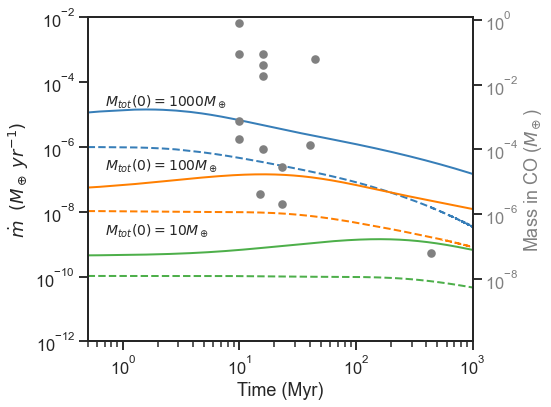

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))


for j in range(0,np.size(dir1)):
    print(j, dir1[j])
    
    if initial_output_many[j] == 1:
        file=dir1[j]+'mdot.dat'
        mdot, timestep=get_mdot_new(file)
        file=dir1[j]+'gas.dat'
        gas, timestep_g=get_gas_new(file)
        delta_gas=get_delta_gas_new(gas, timestep)
        
    else:
        #mdot=get_mdot(file)
        #for now - hack the version using grep Mdot out > mdot.dat 
        file=dir1[j]+ 'mdot.dat'
        mdot, timestep=get_mdot_new(file)
        file=dir1[j]+'gas.dat'
        gas=get_gas(file)

        delta_gas=get_delta_gas(gas)
    
    
    file= dir1[j]+ "inparam.in"
    
    delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho, mtot0, rbelt, alpha, ecc, fv0=get_inparam(file)

    s=2000    
    transition=np.arange(s,10000+1)
    transition=np.delete(transition, [4000-s,5000-s,6000-s,7000-s,8000-s,9000-s])
    delta_gas = np.delete(delta_gas, (transition), axis=0)
    timestep_g=np.delete(timestep_g, transition, axis=0)
    timestep=np.delete(timestep, transition, axis=0)
    mdot=np.delete(mdot, transition, axis=0)
    plt.plot( delta_t*timestep_g/(tyear*1e6), (delta_gas/(delta_t))*(tyear/mearth), label=label[j], color=color_list[j], linestyle='dashed')
        #plt.plot( delta_t*time_out[1:np.size(mdot)-5]/(tyear*1e6), delta_gas[1:np.size(mdot)-5]/(delta_t*outputinterval), label=label[j], color=color_list[j])

    print('plotting', label[j], dir1[j])

    ax.plot( delta_t*timestep/(tyear*1e6), (abs(mdot)/delta_t)*(tyear/mearth), linestyle='solid', color=color_list[j])
    if vol[j]  :        
        rater_all=get_rate(1, dir1[j]+ "rater.dat") 

        rater=np.zeros(nbin)

        for i in range(0,nbin-1): 
            rater[i]=float(rater_all[i])
        index_1km=np.min(np.where(diam_i <1e2))

        #ax.plot( [1./(tyear*1e6*rater[index_1km]),1./(tyear*1e6*rater[index_1km])], [1e-10,1e16], color=color_list[j])    
        print('resurc',h[j],1./(h[j]*tyear*1e6*rater[index_1km]))
            
    rater_all=get_rate(0, dir1[j]+ "ratec.dat") 

    rater=np.zeros(nbin)

    for i in range(0,nbin-1): 
        rater[i]=float(rater_all[i])
    index_1km=np.min(np.where(diam_i <1e3))

    #ax.plot( [1./(tyear*1e6*rater[index_1km]),1./(tyear*1e6*rater[index_1km])], [1e-10,1e16], linestyle=':', color=color_list[j])    
    print('resurc',h[j],1./(h[j]*tyear*1e6*rater[index_1km]) )
    #ax.annotate('$t_c(D=1$km)', xy=(0.4/(tyear*1e6*rater[index_1km]) , 5e14), size=14, color=color_list[j])

    
    
    
    
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'grey'
ax2.set_ylabel('Mass in CO ($M_\oplus$)', color=color)  # we already handled the x-label with ax1

ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color)

#ax2.scatter(df_fgk.age_x[df_fgk.mco>0], df_fgk.mco[df_fgk.mco>0], s=50, color=color)

#ax2.scatter(df_fgk.age_x[df_fgk.det_co>0], df_fgk.mco[df_fgk.det_co>0], s=50, color=color)

ax2.scatter(dft.age_x[dft.mco>0], dft.mco[dft.mco>0], s=50, color=color)

            
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel('Time (Myr)')
#plt.ylabel('$\dot m_{gas}\; \; (M_\oplus Myr^{-1})$')
ax.set_ylabel('$\dot m\; \; (M_\oplus\; yr^{-1})$')



#ax.legend(loc='upper right',prop={"size":14})
ax.annotate(label[0], xy=(0.7, 2e-5), size=14)
ax.annotate(label[1], xy=(0.7, 2e-7), size=14)
ax.annotate(label[2], xy=(0.7, 2e-9), size=14)




ax.set_xlim((0.5,1e3))

mdot_max=1e-2
mdot_min=1e-12
ax.set_ylim((mdot_min, mdot_max))

ax2.set_ylim((mdot_min*120,mdot_max*120))

fig.tight_layout()  # otherwise the right y-label is slightly clipped


plt.savefig(dirsave+"gas_time_addobs.pdf")

    #######################################



   #######################################



In [22]:
print(df_fgk.age_x[df_fgk.det_co>0],df_fgk.name[df_fgk.det_co>0], df_fgk.mco[df_fgk.det_co>0])
print(dft.name[dft.mco>0], dft.age_x[dft.mco>0], dft.mco[dft.mco>0])

4       10
5     23  
Name: age_x, dtype: object 4           HD~146897   
5           HD~181327   
Name: name, dtype: object 4       2.1e-4      
5        2.1e-6     
Name: mco, dtype: object
0              \beta~Pic 
1            49~Ceti     
2            HD~21997    
3            HD~95086    
4            HD~121617   
5            HD~131488   
6            HD~131835   
7            HD~138813   
9               Fomalhaut
10                   TWA7
11               HD 36546
12              HD 129590
13              HD~181327
14             HD~146897 
Name: name, dtype: object 0      23
1      40
2      45
3      15
4      16
5      16
6      16
7      10
9     440
10     10
11     10
12     16
13     23
14     10
Name: age_x, dtype: int64 0     2.800000e-05
1     1.400000e-04
2     6.000000e-02
3     4.300000e-06
4     1.800000e-02
5     8.900000e-02
6     4.000000e-02
7     7.400000e-04
9     6.500000e-08
10    8.000000e-01
11    9.000000e-02
12    1.000000e-04
13    2.100000e-06
14   

In [23]:
# let's assume that all bodies D< 68km experience no heating from LLRs
#  let's focus on the late loss from LLRs - not stellar irradiation 
#  let's focus on loss of CO trapped in amorphous water ice
#  D = 200km % lost by 40Myr is ~100% 
#  D = 74km % lost by 50Myr is 70% 



def time_release_LLR(d):
    
    t_d_200=25e6
    t_d_70=30e6


    const=(t_d_200-t_d_70)/(203e3-74e3)

    
    const_0=t_d_200-const*203e3
    print(const_0, const)
    
    time_release = const_0 + const*d
    return time_release


In [24]:
# let's assume that all bodies D< 68km experience no heating from LLRs
#  let's focus on the late loss from LLRs - not stellar irradiation 
#  let's focus on loss of CO trapped in amorphous water ice
#  D = 200km % lost by 40Myr is ~100% 
#  D = 74km % lost by 50Myr is 70% 



def frac_m_release_LLR(d):
    
    m_d_200=100.
    m_d_70=70.


    const=(m_d_200-m_d_70)/(200e3-74e3)

    
    const_0=m_d_200-const*200e3
    
    m_release = const_0 + const*d
    m_release[m_release>100]=100

    return m_release


In [25]:
# add a toy model for early release
# size distribution 

def toy_early_release_fixed_dust (f_c0, mtot_0, dmax0, time_array, dmax, dmin):

    
    
    if dmax<dmax0:
        print('Error dmax, dmax0', dmax, dmax0)
    q=7/2
    alpha=(q+2)/3;
    if(np.size(f_c0)==0):
        f_c0=0.1
    if(np.size(mtot_0)==0):
        mtot_0=100

    rho=1e3
    d_all=10.**((np.log10(dmax0)-np.log10(dmin))*np.arange(0,1000)/1000. + np.log10(dmin))
    
    mass_d= f_c0* 4.*rho*d_all**3./(3.*(1-f_c0))   
    total_mass_disc=10*mearth

    mtot_initial=mass_d**(2-alpha)
    kconst=f_c0*mtot_0*mearth/((1-f_c0)*np.sum(mtot_initial))
    mtot_d=kconst*mass_d**(2-alpha)
    print('Old Mtot', np.sum(mtot_d)/(f_c0*mearth), mtot_0, dmax0)

    
    d_all=10.**((np.log10(dmax)-np.log10(dmin))*np.arange(0,1000)/1000. + np.log10(dmin))
    mass_d= f_c0* 4.*rho*d_all**3./3.   
    mtot_d=kconst*mass_d**(2-alpha)
    print('New Mtot', np.sum(mtot_d)/(f_c0*mearth), dmax)
    
    time_release_d=time_release_LLR(d_all)
    mdot_average_d = 0.01*frac_m_release_LLR(d_all)*mtot_d/(time_release_d*tyear)

    if dmax>68e3:
        index_68km=np.where(d_all <60e3)
        mdot_average_d[index_68km]=0
    else:
        mdot_average_d[0:np.size(mdot_average_d)]=0.0
        print('No mass lost to gas from LLRs', mdot_average_d[0], mdot_average_d[np.size(mdot_average_d)-1])
   #  mdot_average_d[0:index_68km]=0

    total=np.zeros(np.size(time_array))
    for i in range(0,np.size(time_array)):
        total[i]= np.sum(mdot_average_d[np.where(time_array[i]<time_release_d)])
    return(total)



0 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/
ratio 1.97128e+19 -8.309303e+19 -0.2372377081447144 -0.20384658611100986 -0.09612051812700385
Old Mtot 111.11111111111109 100 30000.0
New Mtot 109.17702153918772 30000.0
32868217.054263566 -38.75968992248062
No mass lost to gas from LLRs 0.0 0.0
Old Mtot 111.11111111111109 100 30000.0
New Mtot 187.69681474801038 100000.0
32868217.054263566 -38.75968992248062
Old Mtot 111.11111111111109 100 30000.0
New Mtot 533.8980654134459 1000000.0
32868217.054263566 -38.75968992248062


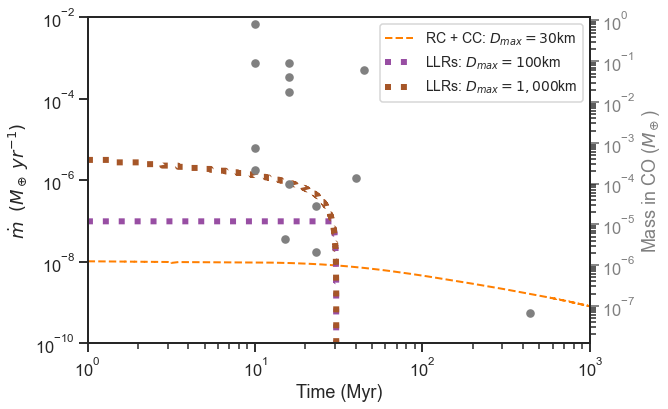

In [29]:
order_list=[4,5, 1]

label_t=['RC + CC: $D_{max}=1,000$km',  'RC + CC: $D_{max}=100$km','RC + CC: $D_{max}=30$km' ]
label_t=['RC + CC: $D_{max}=30$km' ]

fig, ax = plt.subplots(figsize=(9, 6))

dmin=100e-6

time_array =np.arange(0,100000)*1e4
for j in range(0,np.size(dir2)):
    print(j, dir2[j])
    
    if initial_output_many[j] == 1:
        file=dir2[j]+'mdot.dat'
        mdot, timestep=get_mdot_new(file)
        file=dir2[j]+'gas.dat'
        gas, timestep_g=get_gas_new(file)
        delta_gas=get_delta_gas_new(gas, timestep)
        
    else:
        #mdot=get_mdot(file)
        #for now - hack the version using grep Mdot out > mdot.dat 
        file=dir2[j]+ 'mdot.dat'
        mdot, timestep=get_mdot_new(file)
        file=dir2[j]+'gas.dat'
        gas=get_gas(file)

        delta_gas=get_delta_gas(gas)
    
    
    file= dir2[j]+ "inparam.in"
    
    
    delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho, mtot0, rbelt, alpha, ecc, fv0=get_inparam(file)




        # plt.plot( delta_t*timestep_g/(tyear*1e6), (abs(mdot)/delta_t)*(tyear/mearth), color=color_list[j], linestyle='solid')

    plt.plot( delta_t*timestep_g/(tyear*1e6), delta_gas/(delta_t)*tyear/mearth, color=color_list[order_list[j+2]], linestyle='dashed', label=label_t[j])
        #plt.plot( delta_t*time_out[1:np.size(mdot)-5]/(tyear*1e6), delta_gas[1:np.size(mdot)-5]/(delta_t*outputinterval), label=label[j], color=color_list[j])


 #plt.plot( delta_t*timestep_g/(tyear*1e6), (abs(mdot)/delta_t)*(tyear/mearth), color='k' label='Dust')
   

    
     #plt.plot( delta_t*timestep/(tyear*1e6), abs(mdot)/(delta_t), linestyle=':', color=color_list[j])
 #plt.plot( delta_t*timestep_g/(tyear*1e6), delta_gas/(delta_t)*tyear/mearth, label='Gas: RC + CC', color=color_list[order_list[j]], linestyle='dashed')

print('ratio', delta_gas[10],mdot[10], delta_gas[10]/mdot[10],  delta_gas[1000]/mdot[1000],  delta_gas[10000]/mdot[10000])

###plt.plot( delta_t*timestep/(tyear*1e6), abs(mdot)/(delta_t), linestyle=':', color=color_list[j], label='Solids')
          
j=2
f_c0=0.1
mtot_0=100
dmax=30e3
dmax0=30e3

plt.plot(time_array/1e6, toy_early_release_fixed_dust (f_c0, mtot_0, dmax0, time_array, dmax, dmin)*tyear/mearth,  color=color_list[order_list[j]],linestyle='dashed')#*1e6*tyear/mearth)        

###plt.plot([time_release(dmax)/1e6, time_release(dmax)/1e6], [1e4,1e20],color=color_list[j])

j=1
dmax=100e3
plt.plot(time_array/1e6, toy_early_release_fixed_dust (f_c0, mtot_0,dmax0, time_array, dmax, dmin)*tyear/mearth,
         color=color_list[order_list[j]],linestyle='dotted', linewidth=6, label='LLRs: $D_{max}=100$km')#*1e6*tyear/mearth)        


j=0
dmax=1000e3
plt.plot(time_array/1e6,
         toy_early_release_fixed_dust (f_c0, mtot_0, dmax0, time_array, dmax, dmin)*tyear/mearth, 
         color=color_list[order_list[j]], linestyle='dotted', label='LLRs: $D_{max}=1,000$km', linewidth=6)#*1e6*tyear/mearth)        



        
ax.set_xscale('log')
ax.set_yscale('log')


plt.xlabel('Time (Myr)')
#plt.ylabel('$\dot m_{gas}\; \; (M_\oplus Myr^{-1})$')
plt.ylabel('$\dot m\; \; (M_\oplus\; yr^{-1})$')



ax.legend(loc='upper right',prop={"size":14})


ax.set_xlim((1,1e3))
mdot_max=1e-2
mdot_min=1e-10
ax.set_ylim((mdot_min, mdot_max))



    #######################################



   #######################################




   
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'grey'
ax2.set_ylabel('Mass in CO ($M_\oplus$)', color=color)  # we already handled the x-label with ax1
ax2.set_ylim((mdot_min*120,mdot_max*120))
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color, color=color)

#ax2.scatter(age_plot[df_fgk.mco>0], df_fgk.mco[df_fgk.mco>0], s=50, color=color)

ax2.scatter(dft.age_x[dft.mco>0], dft.mco[dft.mco>0], s=50, color=color)
#ax2.scatter(df_fgk.age_x[df_fgk.det_co>0], df_fgk.mco[df_fgk.det_co>0], s=50, color=color)


plt.savefig(dirsave+"gas_early_llr_time_2.pdf")
